# **Classification with Neural Network - House numbers dataset**

## Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load the data

Train data

In [2]:
!curl -O http://ufldl.stanford.edu/housenumbers/train.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  3  385M    3 13.6M    0     0  6466k      0  0:01:01  0:00:02  0:00:59 6463k^C


Unzip folder

In [3]:
!tar -xzvf train.tar.gz

train/
train/4804.png
train/4777.png
train/4759.png
train/4750.png
train/4727.png
train/4722.png
train/4698.png
train/4685.png
train/4655.png
train/4621.png
train/4527.png
train/4496.png
train/4492.png
train/4437.png
train/4394.png
train/4388.png
train/4380.png
train/4377.png
train/4325.png
train/4312.png
train/4298.png
train/4182.png
train/4145.png
train/4140.png
train/4090.png
train/4078.png
train/4034.png
train/4009.png
train/3996.png
train/3957.png
train/3934.png
train/3919.png
train/3896.png
train/3858.png
train/3857.png
train/3767.png
train/3697.png
train/3689.png
train/3668.png
train/3664.png
train/3618.png
train/3553.png
train/3535.png
train/3462.png
train/3415.png
train/3401.png
train/3367.png
train/3362.png
train/3359.png
train/3162.png
train/3161.png
train/3090.png
train/3057.png
train/2974.png
train/2967.png
train/2959.png
train/2949.png
train/2932.png
train/2925.png
train/2916.png
train/2905.png
train/2882.png
train/2738.png
train/2689.png
train/2613.png
train/2564.png
tra

Test data

In [ ]:
!curl -O http://ufldl.stanford.edu/housenumbers/test.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  263M  100  263M    0     0  15.2M      0  0:00:17  0:00:17 --:--:-- 16.8M


Unzip folder

In [ ]:
!tar -xzvf test.tar.gz

Streaming output truncated to the last 5000 lines.
test/2574.png
test/2554.png
test/2550.png
test/2549.png
test/2535.png
test/2528.png
test/2519.png
test/2516.png
test/2510.png
test/2504.png
test/2494.png
test/2491.png
test/2485.png
test/2477.png
test/2470.png
test/2432.png
test/2390.png
test/2385.png
test/2351.png
test/2339.png
test/2320.png
test/2316.png
test/2315.png
test/2296.png
test/2279.png
test/2271.png
test/2258.png
test/2249.png
test/2245.png
test/2229.png
test/2209.png
test/2197.png
test/2192.png
test/2190.png
test/2186.png
test/2178.png
test/2175.png
test/2157.png
test/2154.png
test/2150.png
test/2148.png
test/2128.png
test/2126.png
test/2116.png
test/2103.png
test/2077.png
test/2061.png
test/2047.png
test/2015.png
test/1945.png
test/1939.png
test/1903.png
test/1869.png
test/1859.png
test/1847.png
test/1836.png
test/1826.png
test/1817.png
test/1804.png
test/1796.png
test/1791.png
test/1783.png
test/1773.png
test/1764.png
test/1744.png
test/1718.png
test/1680.png
test/1678.p

## Download .csv files

In [ ]:
import pandas as pd

Train data

In [ ]:
url_train = 'https://raw.githubusercontent.com/krasnopis/paperclub/master/01-SVHN/train_annotations.csv'
col_list = ['filename',	'x_1', 'y_1', 'w_1', 'h_1',	'label_1', 'x_2', 'y_2', 'w_2', 'h_2', 'label_2']
train_data = pd.read_csv(url_train, encoding='unicode_escape', usecols=col_list)

Test data

In [ ]:
url_test = 'https://raw.githubusercontent.com/krasnopis/paperclub/master/01-SVHN/test_annotations.csv'
test_data = pd.read_csv(url_test, encoding='unicode_escape', usecols=col_list)

## Generate a Dataset

Discard all images that have a height of less than 40 and a width of less than 80 pixels. With such a reduced dataset, make a training and test set of numbers cut from the images (using a bounding box) for each object class (0-9).

In [ ]:
from matplotlib import pyplot as plt
import math
from os import path
import os.path

Train data

In [ ]:
locs = train_data['filename']
if not(path.exists('/content/train2/')):
  os.mkdir('/content/train2/')

for i, loc in enumerate(locs):
  im = plt.imread(loc)

  # Discard all images that have a height of less than 40 and a width of less than 80 pixels
  if ((im.shape[0]<40) & (im.shape[1]<80)):
    continue

  # Extract the first bounding box info
  x1 = train_data['x_1'][i]
  y1 = train_data['y_1'][i]
  w1 = train_data['w_1'][i]
  h1 = train_data['h_1'][i]
  label1 = train_data['label_1'][i]
  # Class 0 is wrongly labeled as 10
  if label1 == 10:
    label1 = 0

  # Crop the first number and save it to corresponding folder
  if ((x1>=0) & (y1>=0) & (w1>0) & (h1>0) & (label1>=0) & (label1<=9)):
    im1 = im[y1:y1+h1, x1:x1+w1, :]
    save_loc = path.join('train2', str(label1), str(i).zfill(5) + '.png')
    
    # Create new folder for every new class (0-9)
    if not(path.exists('/content/train2/' + str(label1))):
      os.mkdir('/content/train2/' + str(label1))
    
    plt.imsave(save_loc, im1)

  # Skip if there is no second number
  if math.isnan(train_data['x_2'][i]):
    continue

  # Extract the second bounding box info
  x2 = int(train_data['x_2'][i])
  y2 = int(train_data['y_2'][i])
  w2 = int(train_data['w_2'][i])
  h2 = int(train_data['h_2'][i])
  label2 = int(train_data['label_2'][i])
  if label2 == 10:
    label2 = 0
  
  # Crop the second number and save it to corresponding folder
  if ((x2>=0) & (y2>=0) & (w2>0) & (h2>0) & (label2>=0) & (label2<=9)):
    im2 = im[y2:y2+h2, x2:x2+w2, :]
    save_loc = path.join('train2', str(label2), str(i).zfill(5) + '.png')

    if not(path.exists('/content/train2/' + str(label2))):
      os.mkdir('/content/train2/' + str(label2))

    plt.imsave(save_loc, im2)

Test data

In [ ]:
locs = test_data['filename']
if not(path.exists('/content/test2/')):
  os.mkdir('/content/test2/')

for i, loc in enumerate(locs):
  im = plt.imread(loc)

  if ((im.shape[0]<40) & (im.shape[1]<80)):
    continue

  x1 = test_data['x_1'][i]
  y1 = test_data['y_1'][i]
  w1 = test_data['w_1'][i]
  h1 = test_data['h_1'][i]
  label1 = test_data['label_1'][i]
  if label1 == 10:
    label1 = 0

  if ((x1>=0) & (y1>=0) & (w1>0) & (h1>0) & (label1>=0) & (label1<=9)):
    im1 = im[y1:y1+h1, x1:x1+w1, :]
    save_loc = path.join('test2', str(label1), str(i).zfill(5) + '.png')
    
    if not(path.exists('/content/test2/' + str(label1))):
      os.mkdir('/content/test2/' + str(label1))
    
    plt.imsave(save_loc, im1)

  if math.isnan(test_data['x_2'][i]):
    continue
  
  x2 = int(test_data['x_2'][i])
  y2 = int(test_data['y_2'][i])
  w2 = int(test_data['w_2'][i])
  h2 = int(test_data['h_2'][i])
  label2 = int(test_data['label_2'][i])
  if label2 == 10:
    label2 = 0

  if ((x2>=0) & (y2>=0) & (w2>0) & (h2>0) & (label2>=0) & (label2<=9)):
    im2 = im[y2:y2+h2, x2:x2+w2, :]
    save_loc = path.join('test2', str(label2), str(i).zfill(5) + '.png')

    if not(path.exists('/content/test2/' + str(label2))):
      os.mkdir('/content/test2/' + str(label2))

    plt.imsave(save_loc, im2)

In [ ]:
import os

for i in range(10):
  path = '/content/train2/' + str(i)

  files = os.listdir(path) # dir is your directory path
  number_files = len(files)
  print("Klasa: ", i)
  print("Broj slika: ", number_files)

Klasa:  0
Broj slika:  2581
Klasa:  1
Broj slika:  7999
Klasa:  2
Broj slika:  6124
Klasa:  3
Broj slika:  4817
Klasa:  4
Broj slika:  4132
Klasa:  5
Broj slika:  3953
Klasa:  6
Broj slika:  3224
Klasa:  7
Broj slika:  3053
Klasa:  8
Broj slika:  2754
Klasa:  9
Broj slika:  2524


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

## Split data into train, validation and test set

Following structures will contains both images and labels

In [ ]:
image_size = (30, 30) # all images will be the same size
batch_size = 32

# Train dataset - contains both images and labels
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train2",
    labels='inferred',
    validation_split=0.2, # 80% of all training images are actually for training
    subset="training",
    seed=1337,
    shuffle = True, # data must be shuffled for training phase
    image_size=image_size,
    batch_size=batch_size,
)

# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train2",
    labels='inferred',
    validation_split=0.2, # 20% of all training images are for validation
    subset="validation",
    seed=1337,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size,
)

# Test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "test2",
    labels='inferred',
    seed=1337,
    image_size=image_size,
    batch_size=19751,
    shuffle = False,
)

Found 41161 files belonging to 10 classes.
Using 32929 files for training.
Found 41161 files belonging to 10 classes.
Using 8232 files for validation.
Found 19751 files belonging to 10 classes.


Also separate images from labels for easier manipulation

In [ ]:
for images, labels in train_ds.take(1):
    train_images = images.numpy()
    train_labels = labels.numpy()

for images, labels in val_ds.take(1):
    val_images = images.numpy()
    val_labels = labels.numpy()

for images, labels in test_ds.take(1):
    test_images = images.numpy()
    test_labels = labels.numpy()

Check if the data is located well

In [ ]:
# Train image
i = 0
plt.imshow(train_images[i, :, :, :] / 255)
train_labels[i]

In [ ]:
# Validation image
i = 0
plt.imshow(val_images[i, :, :, :] / 255)
val_labels[i]

In [ ]:
# Test image
i = 0
plt.imshow(test_images[i, :, :, :] / 255)
test_labels[i]

## Visualize the data

Here are the first 9 images in the training dataset.

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomZoom(.5, .2),
        layers.RandomRotation(0.05),
        layers.RandomContrast(0.2)
    ]
)

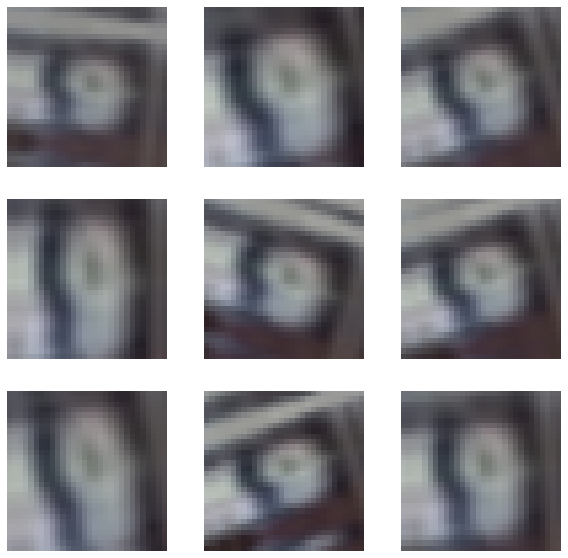

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## Configure the dataset for performance

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

## Build a model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling

num_filters = 8
filter_size = 3
pool_size = 2

num_classes = 10

# Build the model.
model = Sequential([
  # RGB channel values are in the [0, 255] range. This is not ideal for a neural network; 
  # In general we should seek to make our input values small. 
  # We standardize values to be in the [0, 1] range.                  
  Rescaling(1.0 / 255),                  
  Conv2D(num_filters, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(2 * num_filters, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dropout(0.5),
  Dense(num_classes, activation='softmax'), # softmax is used for multiclass classification
])

#model.summary()

## Train the model

In [ ]:
# maximum number of epochs
epochs = 30 

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) # stop training when a monitored metric has stopped improving.
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy", # multiclass classification
    metrics=["accuracy"],
)

history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Run the model on new data

Test loss and accuracy

In [ ]:
score = model.evaluate(test_ds, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
import numpy as np

y_pred = model.predict(test_ds)
y_pred = np.argmax(y_pred, axis = 1)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

## Confusion matrix

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Run the algorithm for some specific test image

In [ ]:
# Choose random test image
import random
i = random.randint(0, len(test_labels)) 
plt.imshow(test_images[i, :, :, :] / 255)
print("True label:", test_labels[i])
print("Predicted label:",  y_pred[i])